In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp

In [2]:
import os
import numpy as np
import pandas as pd

# Pandas

## DataFrame 만들기

In [3]:
df = pd.DataFrame({
    "col1" : ["foo1", "foo2", "foo3"],
    "col2" : ["bar1", "bar2", "bar3"],
    "col3" : ["A", "B", "C"],
    "col4" : [100, 200, 300]
})

In [4]:
df

,col1,col2,col3,col4
0,foo1,bar1,A,100
1,foo2,bar2,B,200
2,foo3,bar3,C,300


In [5]:
rsp.showMulti(
    type(df["col1"]), df["col1"], df.col1
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [6]:
# dictionary로 부터 만들기
dfDict = pd.DataFrame.from_dict({
    "row0" : {"col0":0, "col1":"A"},
    "row1" : {"col0":1, "col1":"B"}
})

In [7]:
rsp.showMulti(
    dfDict, dfDict.T
)


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## 외부 데이터 Load/Save

In [8]:
dfCsv = pd.read_csv("resources/demo.csv")

In [9]:
dfCsv

,index,Animal,Cuteness,Description
0,1,dog,8.5,want to
1,2,cat,'9.1',na
2,3,tiger,2.3,-


In [10]:
dfCsv.to_excel("demo.xls", index=False)

In [11]:
dfXls = pd.read_excel("demo.xls")
dfXls

,index,Animal,Cuteness,Description
0,1,dog,8.5,want to
1,2,cat,'9.1',na
2,3,tiger,2.3,-


In [12]:
os.remove("demo.xls")

## Dataframe Query

In [13]:
# select where
rsp.showMulti(
    df[df.col1 == "foo1"], df[ (df.col1 == "foo1") & (df.col4 <= 200) ]
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [14]:
# join
rsp.showMulti(
    df, dfDict.T, dfDict.T.rename(columns={"col1":"col3"})
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [15]:
rsp.showMulti(
    pd.merge(df, dfDict.T.rename(columns={"col1":"col3"}), on="col3", how="inner"),
    pd.merge(df, dfDict.T.rename(columns={"col1":"col3"}), on="col3", how="outer"),
    pd.merge(df, dfDict.T.rename(columns={"col1":"col3"}), on="col3", how="right"),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# Matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
# rsp.getSystemFonts("nanum")

In [18]:
plotConf = rsp.EduPlotConf(font="NanumGothicCoding")
plotConf.set()
rsp.setSystemWarning()

In [19]:
x = np.arange(100)
y = np.random.rand(100)

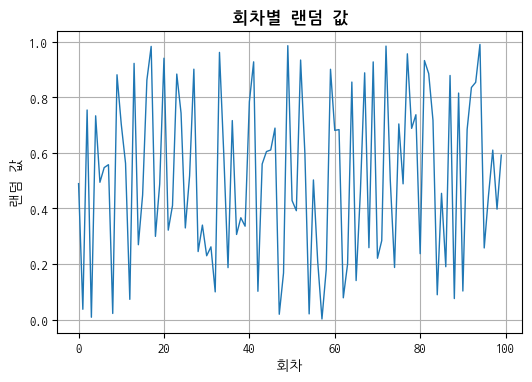

In [20]:
plt.plot(x, y)
plt.title("회차별 랜덤 값")
plt.ylabel("랜덤 값")
plt.xlabel("회차")
plt.grid(True)
plt.show()

## 함수 그리기

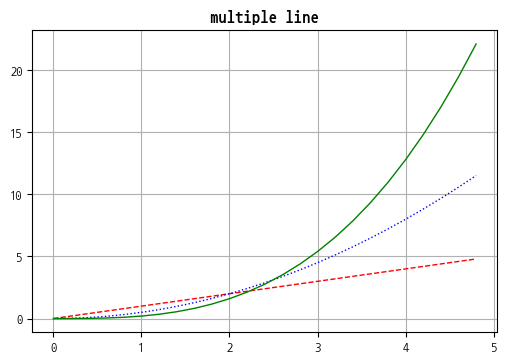

In [21]:
t = np.arange(.0, 5.0, 0.2)
plt.plot(t, t, "r--")
plt.plot(t, 0.5*t**2, "b:")
plt.plot(t, 0.2*t**3, "g")

plt.title("multiple line")
plt.grid(True)
plt.show()

### 색
| 색 문자 | 의미 |<b>\|</b> | 색 문자 | 의미 | <b>\|</b> | 색 문자 | 의미 |<b>\|</b> | 색 문자 | 의미 |<b>\|</b>| 색 문자 | 의미 |
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|b|blue|<b>\|</b>|g|green|<b>\|</b>|r|red|<b>\|</b>|c|cyan|<b>\|</b>|m|magenta|
|y|yellow|<b>\|</b>|k|black|<b>\|</b>|w|white|

### 마커(marker)
|마커문자|의미|<b>\|</b>|마커문자|의미|<b>\|</b>|마커문자|의미|<b>\|</b>|마커문자|의미|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|.|point marker|<b>\|</b>|,|pixel marker|<b>\|</b>|o|circle marker|<b>\|</b>|v|triangle_down marker|
|^|triangle_up marker|<b>\|</b>|<|triangle_left marker|<b>\|</b>|>|triangle_right marker|<b>\|</b>|1|tri_down marker|
|2|tri_up marker|<b>\|</b>|3|tri_left marker|<b>\|</b>|4|tri_right marker|<b>\|</b>|s|square marker|
|p|pentagon marker|<b>\|</b>|\*|star marker|<b>\|</b>|h|hexagon1 marker|<b>\|</b>|H|hexagon2 marker|
|+|plus marker|<b>\|</b>|x|x marker|<b>\|</b>|D|diamond marker|<b>\|</b>|d|thin_diamond marker|

### 선
|선 문자|의미|<b>\|</b>|선 문자|의미|<b>\|</b>|선 문자|의미|<b>\|</b>|선 문자|의미|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|-|solid line style|<b>\|</b>|--|dashed line style|<b>\|</b>|-.|desh-dot line style|<b>\|</b>|:|dotted line style|

## EduPlot 활용

In [22]:
eduPlot = rsp.EduPlot2D(rsp.EduPlotConf(font="NanumGothicCoding", figScale=1.5))

In [23]:
eduPlot.addFunction("0.05*x**3", name="function01", color="#AAAA00")

In [24]:
x = np.arange(.0, 5.0, 0.2)
y1 = 0.5*x**2
y2 = 0.2*x**3
eduPlot.addXYData(x, x, "demo01", "r--")
eduPlot.addXYData(x, y1, "demo02", "b:")
eduPlot.addXYData(x, y2, "demo03", "g")

In [25]:
eduPlot.addText  ([ [ 6, 6] ], ["test demo"])
eduPlot.addMarker([ [ 7, 3] ], "v", color="#FF0000")
eduPlot.addVector([ [-2, 2] ], [ [4, 0] ])

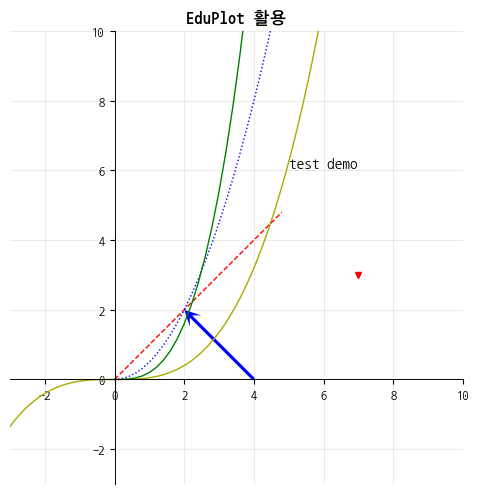

In [26]:
eduPlot.genSpace([-3, 10], [-3, 10], "EduPlot 활용")

# Seaborn

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set()
sns.set_style('whitegrid')

In [29]:
iris = sns.load_dataset("iris") # 붓꽃 테스트 데이터
type(iris)

pandas.core.frame.DataFrame

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Sepal Length : 꽃받침의 길이 정보.
* Sepal Width : 꽃받침의 너비 정보.
* Petal Length : 꽃잎의 길이 정보.
* Petal Width : 꽃잎의 너비 정보.
* Species : 꽃의 종류 정보 (setosa / versicolor / virginica 의 3종류로 구분).

In [31]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [32]:
rsp.EduPlotConf(font="NanumGothicCoding").set()

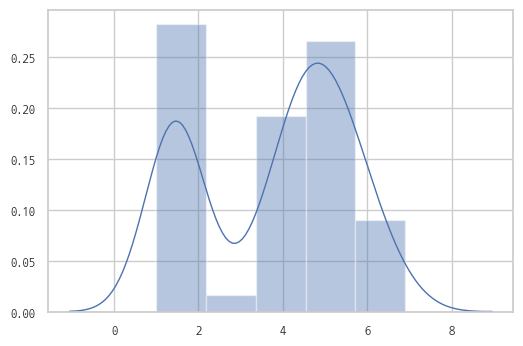

In [33]:
sns.distplot(iris.petal_length.values)
plt.grid(True)
plt.show()

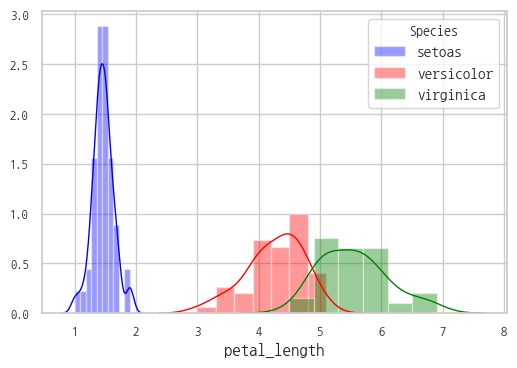

In [34]:
sns.distplot(iris[iris.species=="setosa"].petal_length,     color="blue",   label="setoas")
sns.distplot(iris[iris.species=="versicolor"].petal_length, color="red",    label="versicolor")
sns.distplot(iris[iris.species=="virginica"].petal_length,  color="green",  label="virginica")
plt.legend(title="Species")
plt.show()

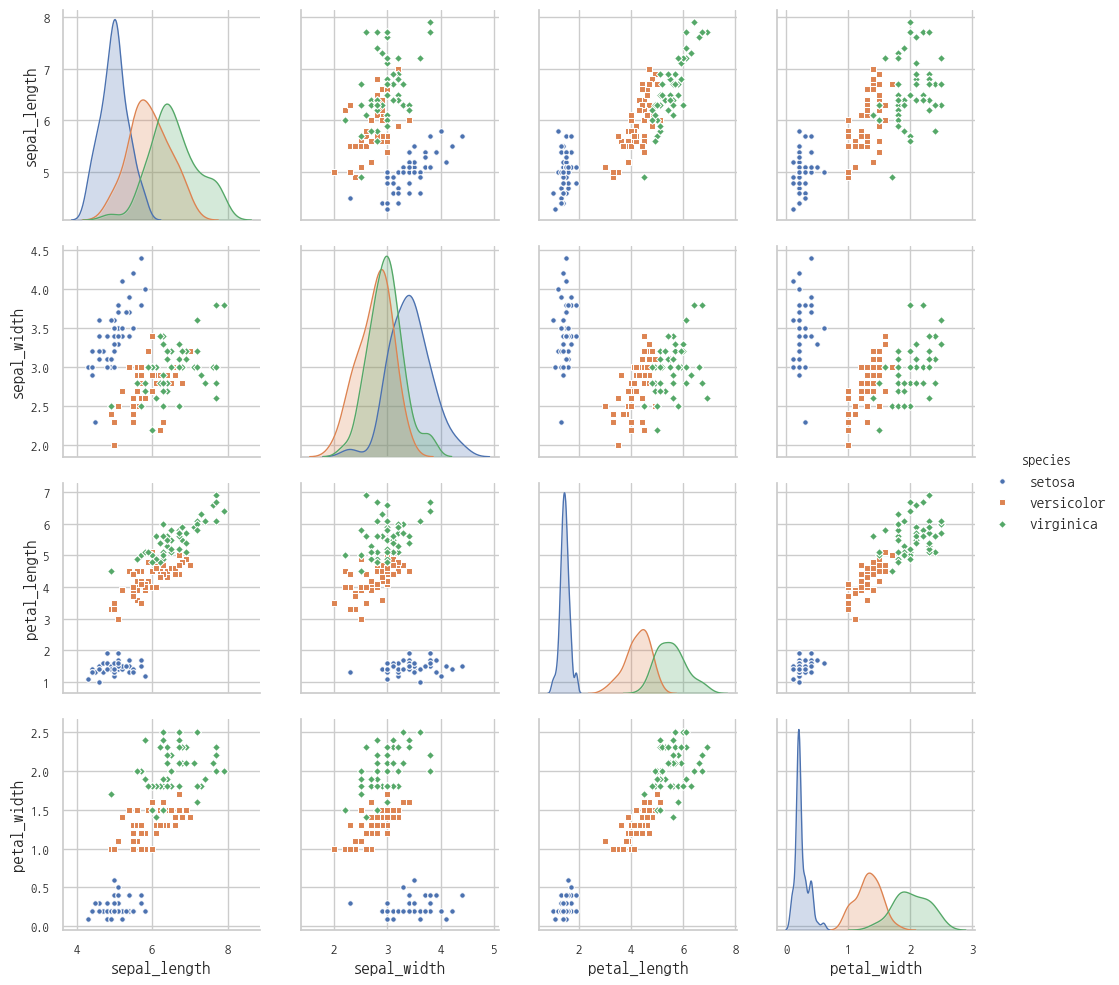

In [35]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

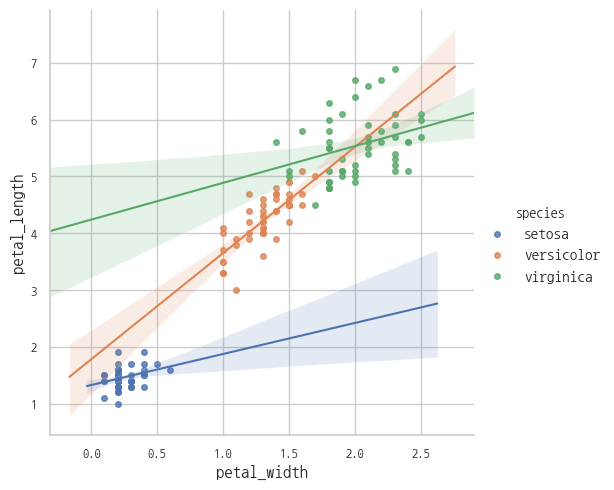

In [36]:
sns.lmplot(data=iris, x="petal_width", y="petal_length", hue="species")
plt.show()

# Numpy & Tensor

In [37]:
import numpy as np
import tensorflow as tf

In [38]:
np.set_printoptions(linewidth=200, precision=2)

In [39]:
np2d = np.random.random([4, 5])
np3d = np.random.random([3, 4, 5])
np2d.shape, np3d.shape

((4, 5), (3, 4, 5))

In [40]:
rsp.showMulti(np2d, np3d)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [41]:
tf2d = tf.convert_to_tensor(np2d)
tf3d = tf.Variable(np3d)
tf2d.shape, tf3d.shape

(TensorShape([4, 5]), TensorShape([3, 4, 5]))

In [42]:
rsp.showMulti(tf2d, tf3d)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [43]:
tf2d.numpy()

array([[0.76, 0.91, 0.67, 0.6 , 0.62],
       [0.9 , 0.02, 0.39, 0.94, 0.71],
       [0.47, 0.26, 0.31, 0.71, 0.9 ],
       [0.38, 0.73, 0.77, 0.15, 0.77]])

## Slicing

In [44]:
#list slicing
demoList = [1, 2, 3, 4, 5]
rsp.showMulti(demoList[0], demoList[0:2], demoList[-1], demoList[:-1], demoList[1:-2])

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [45]:
np2d[0]

array([0.76, 0.91, 0.67, 0.6 , 0.62])

In [46]:
rsp.showMulti(np2d[:, 0], np2d[:, [0]], np2d[:, 0:1])

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [47]:
rsp.showMulti(tf2d[:,0].numpy(), tf.reshape(tf2d[:,0], [-1, 1]).numpy())

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [48]:
np3d[0:2,:,2:3]

array([[[0.44],
        [0.81],
        [0.82],
        [0.87]],

       [[0.61],
        [1.  ],
        [0.01],
        [0.33]]])

In [49]:
np3d

array([[[0.03, 0.99, 0.44, 0.5 , 0.33],
        [0.85, 0.03, 0.81, 0.34, 0.98],
        [0.46, 0.91, 0.82, 0.83, 0.07],
        [0.51, 0.97, 0.87, 0.98, 0.07]],

       [[0.89, 0.59, 0.61, 0.04, 0.09],
        [0.52, 0.53, 1.  , 0.54, 0.29],
        [0.23, 0.11, 0.01, 0.89, 0.7 ],
        [0.93, 0.2 , 0.33, 0.75, 0.82]],

       [[0.32, 0.83, 0.65, 0.47, 0.01],
        [0.12, 0.99, 0.76, 0.66, 0.85],
        [0.74, 0.71, 0.33, 0.49, 0.04],
        [0.41, 0.91, 0.29, 0.92, 0.57]]])

In [50]:
rsp.showMulti(np3d[1], np3d[1][1:3,1:2])

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Reshape

In [51]:
rsp.showMulti(np2d, np2d.reshape([-1, 2], order="C"), np2d.reshape([-1, 2], order="F"))

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [52]:
print(np3d.shape)
rsp.showMulti(np3d, np3d.reshape([-1, 20])
)

(3, 4, 5)


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [53]:
rsp.showMulti(
    np3d.reshape([12, 5]), np3d.reshape([-1, 5])
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [54]:
selector = np.array([1, 2, 1, 3, 0, 0, 0])
rsp.showMulti(np2d, np2d[selector])

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Compute

In [55]:
rsp.showMulti(np2d, np.max(np2d), np.min(np2d))

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [56]:
np.argmax(np2d), np.argmin(np2d)

(8, 6)

In [57]:
rsp.showMulti(
    np.max(np2d, axis=1), np.max(np2d, axis=0)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [58]:
rsp.showMulti(
    np.average(np2d), tf.reduce_mean(tf2d).numpy()
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [59]:
rsp.showMulti(
    np.sum(np2d, axis=1), tf.reduce_sum(tf2d, axis=1).numpy()
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [60]:
np2d

array([[0.76, 0.91, 0.67, 0.6 , 0.62],
       [0.9 , 0.02, 0.39, 0.94, 0.71],
       [0.47, 0.26, 0.31, 0.71, 0.9 ],
       [0.38, 0.73, 0.77, 0.15, 0.77]])

In [61]:
np.where(np2d > 0.5)

(array([0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3]),
 array([0, 1, 2, 3, 4, 0, 3, 4, 3, 4, 1, 2, 4]))

In [62]:
np.where(np2d > 0.5, 1, 0)

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1]])

## Function

In [63]:
# Broadcasting
rsp.showMulti(np2d, np2d+1, np2d/2)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [64]:
# Transpose
rsp.showMulti(np2d, np2d.T)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [65]:
# Stack
rsp.showMulti(
    np.stack([np2d, np2d]), np.stack([np2d, np2d]).shape, np2d.shape
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [66]:
# ones / zeros
rsp.showMulti(np.ones([2, 2]), np.zeros([2, 3]))

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [67]:
rsp.showMulti(tf.ones([2, 2]), tf.zeros([2, 3]))

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [68]:
# One Hot Encoding

In [69]:
selector = np.array([0, 1, 2, 1, 1, 2, 2])
np.eye(3)[selector]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

# Interact

In [70]:
from ipywidgets import interactive

In [71]:
eduPlot = rsp.EduPlot2D(rsp.EduPlotConf(font="NanumGothicCoding"))

In [72]:
def draw2D(srcX, srcY, offset):
    eduPlot.addFunction(f"{offset}*x**3")
    eduPlot.addVector([ [-1, 1] ], [ [srcX, srcY] ])
    return eduPlot.genSpace(4)

In [73]:
interactive(draw2D, srcX=(-2.0, 2.0), srcY=(-2.0, 2.0), offset=(-1.0, 1.0))

interactive(children=(FloatSlider(value=0.0, description='srcX', max=2.0, min=-2.0), FloatSlider(value=0.0, de…

In [74]:
target = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
def analysisIris(x, y):
    sns.lmplot(data=iris, x=x, y=y, hue="species")
    plt.show()
    plt.close()

In [75]:
def analysisDist(x):
    targetName = target[x]
    sns.distplot(iris[iris.species=="setosa"][targetName],     color="blue",   label="setoas")
    sns.distplot(iris[iris.species=="versicolor"][targetName], color="red",    label="versicolor")
    sns.distplot(iris[iris.species=="virginica"][targetName],  color="green",  label="virginica")
    plt.legend(title="Species")
    plt.show()
    plt.close()

In [76]:
rsp.showMulti(
    interactive(analysisIris, x=target, y=target),
    interactive(analysisDist, x=(0, 3))
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…